## Update the datajoint schema diagram

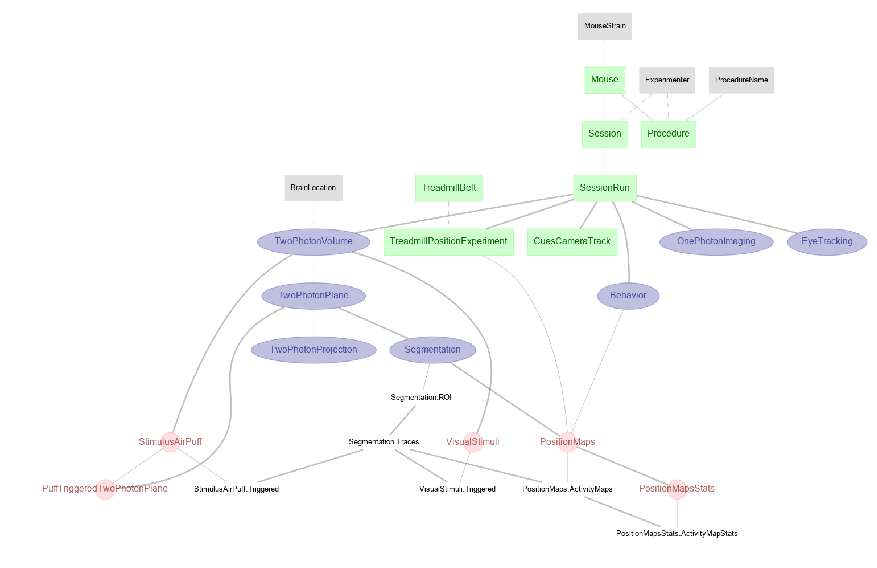

In [13]:
from os.path import join,dirname
import djexpcode
modulepath = dirname(dirname(djexpcode.__file__))
from djexpcode.schemas import *
# Save the datajoint schema diagram
tmp = dj.ERD(schema)
tmp.save(join(modulepath,'figures','schemasdiagram.png'))
import pylab as plt
fig = plt.figure(figsize = [15,15])
tmp.draw()

In [4]:
# Mice used in the study
print(Mouse())

*mouse_id    dob            gender     strain_name   
+----------+ +------------+ +--------+ +------------+
EV029        2017-03-27     F          Thy1-GCaMP6s  
EV038        2017-06-22     M          Thy1-GCaMP6s  
JC027        2016-11-28     M          Thy1-GCaMP6s  
JC048        2017-06-19     M          CaMKII-tTa-TRE
JC049        2017-06-27     F          Rorb-IRES2-Cre
JC054        2017-06-19     M          Rorb-IRES2-Cre
JC059        2017-09-27     M          Rorb-IRES2-Cre
JC060        2017-09-27     F          Rorb-IRES2-Cre
JC062        2017-09-29     F          CaMKII-tTA-TRE
JC078        2018-03-15     M          CaMKII-tTA-TRE
JC079        2018-03-15     M          CaMKII-tTA-TRE
SK071        2017-12-12     M          C57BL/6J      
SK072        2017-12-12     M          C57BL/6J      
 (Total: 13)



In [18]:
# Rough estimate of the number of cells
from djexpcode.schemas import *
from djexpcode import *
import pandas as pd

mids = Mouse().fetch('mouse_id')
rois = []
for mid in mids:
    rois.append((Segmentation.ROI() &
                 'mouse_id = "{0}"'.format(mid)).fetch(
        'session_name','session_subname','roi','plane'))
ncells = np.ones(len(rois))
for i,r in enumerate(rois):
    for ses in np.unique(r[0]):
        the_set = [(a,b) for a,b in zip(r[2][r[0] == ses],
                                        r[3][r[0] == ses])]
        c = np.unique(the_set).shape[0]
        c = pd.DataFrame(the_set)
        c = c.drop_duplicates().shape[0]
        s = np.unique(r[1][r[0] == ses]).shape[0]
        print('{2} N runs: {0} {1}'.format(s,c,ses))
        ncells[i] += c 
print(np.sum(ncells))

180209_SK072_2P_JC N runs: 8 1878
180212_SK072_2P_JC N runs: 6 1395
171102_JC048_2P_JC N runs: 4 3398
171107_JC048_2P_S1_JC N runs: 1 844
171107_JC048_2P_V1_JC N runs: 1 1620
180316_JC062_2P_JC N runs: 4 3778
180515_JC062_2P_JC N runs: 3 5536
181008_JC079_2P_JC N runs: 2 3116
181009_JC079_2P_JC N runs: 3 3642
180113_JC049_2P_SK N runs: 2 74
180114_JC049_2P_SK N runs: 3 109
180122_JC049_2P_SK N runs: 2 62
180123_JC049_2P_SK N runs: 2 70
180425_JC054_2P_JC N runs: 1 919
180425_JC059_2P_JC N runs: 1 1751
180117_JC060_2P_SK N runs: 2 196
180123_JC060_2P_SK N runs: 1 331
180208_JC060_2P_JC N runs: 3 1556
180122_EV029_2P_JC N runs: 3 903
171129_EV038_2P_S1_JC N runs: 1 1131
171129_EV038_2P_V1_JC N runs: 2 1616
171201_EV038_2P_S1_JC N runs: 2 1490
171201_EV038_2P_V1_JC N runs: 1 1766
171206_EV038_2P_JC N runs: 5 2261
171206_EV038_2P_lat_JC N runs: 2 1219
180118_EV038_2P_JC N runs: 5 256
170731_JC027_2P_JC N runs: 1 100
170802_JC027_2P_JC N runs: 2 87
41117.0
